In [1]:
from gensim import models
from tsne import bh_sne
import numpy as np
import pandas as pd
import random
from collections import defaultdict

import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, output_file, reset_output, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models import BoxZoomTool, ResetTool, ResizeTool, WheelZoomTool, PanTool
output_notebook()
%matplotlib inline
import pandas as pd

Loading BokehJS ...

In [15]:
# FAKE DATA for word2vec + t-sne + bokeh

# items need to be strings
all_items = map(str, range(100))
# number of sequences
n = 20000
# number of items in a sequence
seq_len = 10
sequences = [random.sample(items, seq_len) for _ in range(n)]

In [25]:
# word2vec
model = models.Word2Vec(sequences, size=100, window=100)
items = model.index2word
vectors = model.syn0
w2v = dict(zip(items, vectors))

In [26]:
# t-sne
X = np.array([np.array(vec) for _, vec in item_vectors])
X_2d = bh_sne(X.astype(np.float64))
np.set_printoptions(suppress=True)

In [39]:
# put the data in a dataframe for convenience
df = pd.DataFrame({
    'name': items, 
    'category': ["category %s" % item[0] for item in items], 
    'x': X_2d[:, 0], 
    'y': X_2d[:, 1]})

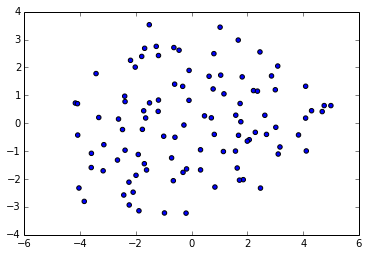

In [40]:
# matplotlib plot 
plt.scatter(df.x, df.y)

In [41]:
def plot(data, dot_size=5, dot_alpha=0.2, title='', no_color=True, plot_size=700):
    cmap = defaultdict(lambda: "Black")
    source = ColumnDataSource(
            data=dict(
                x=data.x,
                y=data.y,
                desc=data.name,
                colo=map(lambda x: cmap[x], data.category)
            )
        )

    hover = HoverTool(
            tooltips="""
            <div>
                <div>
                    <div style="width: 400px; font-size: 17px; font-weight: bold;">@desc</div>
                </div>
            </div>
            """
        )
    tools = [hover, BoxZoomTool(), ResetTool(), ResizeTool(), WheelZoomTool(), PanTool()]
    p = figure(plot_width=plot_size, plot_height=plot_size, tools=tools,
               title=title)

    p.circle('x', 'y', size=dot_size, source=source, 
             fill_color="colo", alpha=dot_alpha, line_color=None)
    show(p)

In [42]:
plot(df, dot_alpha=0.6)

In [63]:
def plot_by_category(data, dot_size=5, dot_alpha=0.2, title='', plot_size=700, cmap=None):
    if cmap is None:
        cmap = defaultdict(lambda: 'Black')
    source = ColumnDataSource(
            data=dict(
                x=data.x,
                y=data.y,
                desc=data.name,
                colo=map(lambda x: cmap[x], data.category)
            )
        )

    hover = HoverTool(
            tooltips="""
            <div>
                <div>
                    <div style="width: 400px; font-size: 17px; font-weight: bold;">@desc</div>
                </div>
            </div>
            """
        )
    tools = [hover, BoxZoomTool(), ResetTool(), ResizeTool(), WheelZoomTool(), PanTool()]
    p = figure(plot_width=plot_size, plot_height=plot_size, tools=tools,
               title=title)

    p.circle('x', 'y', size=dot_size, source=source, 
             fill_color="colo", alpha=dot_alpha, line_color=None)
    categories = set(data.category)
    fake_source = ColumnDataSource(data={'x': [],'y': []})
    for cat in categories:
        color = cmap[cat]
        p.circle('x', 'y', size=20, source=fake_source, legend=cat, 
             fill_color=color, alpha=1, line_color=None)
        
    show(p)

In [64]:
cmap = {
        'category 0': 'Black',
        'category 1': 'Green',
        'category 2':  'deeppink',
        'category 3': 'midnightblue',
        'category 4': 'mediumpurple',
        'category 5': 'Orange',
        'category 6': 'firebrick',
        'category 7': 'lightseagreen',
        'category 8': 'Yellow',
        'category 9': 'Brown'
}
plot_by_category(df, dot_size=10, dot_alpha=0.8, cmap=None)